In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import json
import csv
from scipy.stats import shapiro

In [45]:
import seaborn as sns
sns.set(style="ticks")
sns.set_color_codes("colorblind")
sns.set(style="darkgrid")

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
color = [
'#000000',
'#000080',
'#0B0BFF',
'#98B5FF', 
'#BBC9DB',
'#797975',
'#0198E1',
'#00688B',
'#74CDDC', #nej
'#05EDFF',  
'#C9FFFF', 
'#8FBCBC',
'#457371',
'#28AE7B',
'#4DFFA5'
]

In [48]:
data = pd.read_csv('final.csv', encoding='utf-8', low_memory=False)
data.head()

,TRIP_ID,ROUTE,DAY_OF_WEEK,DATE,UNICORN,START_TIME,HEADSIGN,STOP_ID,STOP_SEQUENCE,STOP_NAME,SHAPE_DIST_TRAVELED,DELAY,DIFF_DELAY,PREV_DELAY,SEQUENCE
0,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U1502Z2,14,"Dolní Břežany,Náměstí",13.17849,98.0,0.0,NaN,1
1,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U1501Z2,15,"Dolní Břežany,Na kopečku",13.80006,32.0,-66.0,98.0,2
2,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U545Z2,16,Písnice,16.55734,45.0,13.0,32.0,3
3,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U546Z2,17,Ke Březině,16.93703,29.0,-16.0,45.0,4
4,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U871Z2,18,Lipovická,17.13697,11.0,-18.0,29.0,5


In [49]:
len(data['UNICORN'].unique())

335

In [50]:
df = data

In [71]:
#sns.pairplot(df[['DELAY','DIFF_DELAY','SEQUENCE']])

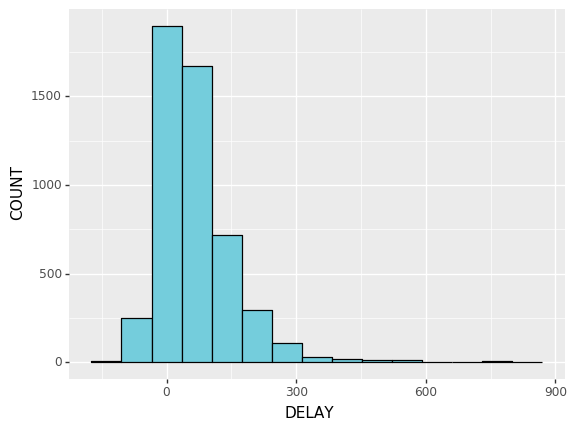

<ggplot: (-9223371892213225468)>

In [52]:
# histogram
plot_hist1 = ggplot(df, aes(x='DELAY')) + \
            geom_histogram(color='black', fill='#74CDDC', bins=15) + \
            xlab("DELAY") + \
            ylab("COUNT")

plot_hist1

In [53]:
# normality test
stat, p = shapiro(df['DELAY'])
print(f'Statistics={stat}, p={round(p,5)}')

alpha = 0.1
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.8426801562309265, p=0.0
Sample does not look Gaussian (reject H0)


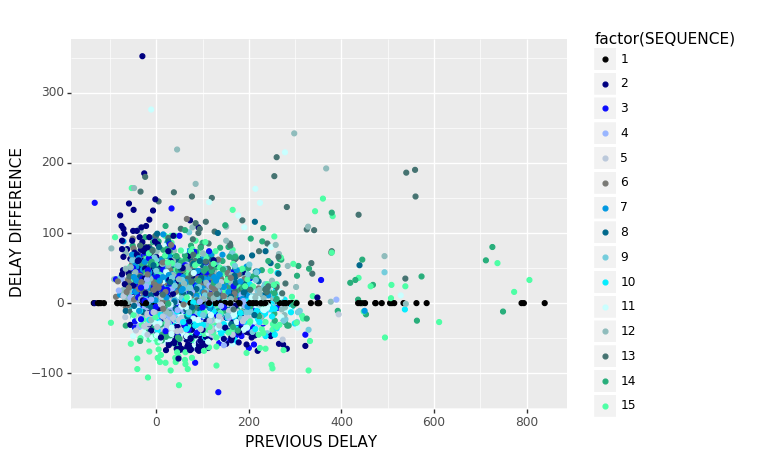

<ggplot: (-9223371892213123032)>

In [54]:
# zavislost zpozdeni z predchozi zastavky na rozdilu ve zpozdeni na urovni vsech zastavek 
plot_point1 = ggplot(df,(aes(x='PREV_DELAY', y='DIFF_DELAY',color = 'factor(SEQUENCE)'))) + \
        scale_color_manual(values=color) + \
        geom_point() + \
        xlab("PREVIOUS DELAY") + \
        ylab("DELAY DIFFERENCE")
plot_point1

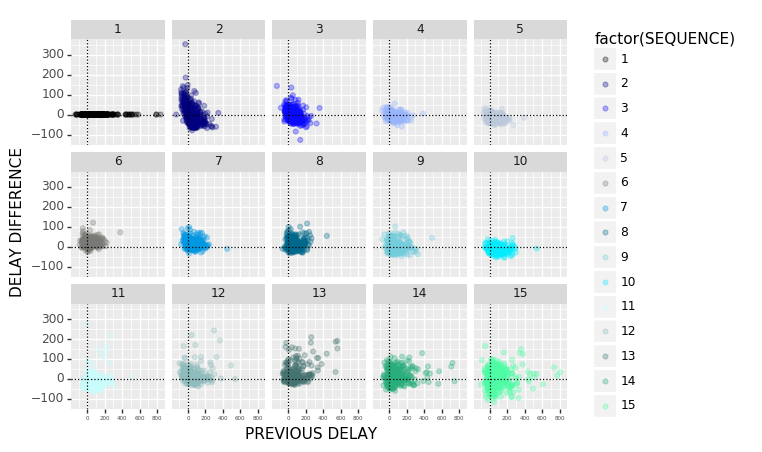

<ggplot: (-9223371892212962028)>

In [55]:
# zavislost zpozdeni z predchozi zastavky na rozdilu ve zpozdeni na urovni jednotlivych zastavek 
plot_point2 = ggplot(df, aes(x='PREV_DELAY', y='DIFF_DELAY', color = 'factor(SEQUENCE)' )) + \
        geom_point(alpha=0.3) + \
        geom_hline(yintercept=0,linetype='dotted') + \
        geom_vline(xintercept=0,linetype='dotted') + \
        theme(axis_text_x = element_text(size=4)) + \
        facet_wrap(['SEQUENCE'], nrow=3) + \
        scale_color_manual(values=color) + \
        xlab("PREVIOUS DELAY") + \
        ylab("DELAY DIFFERENCE")
plot_point2

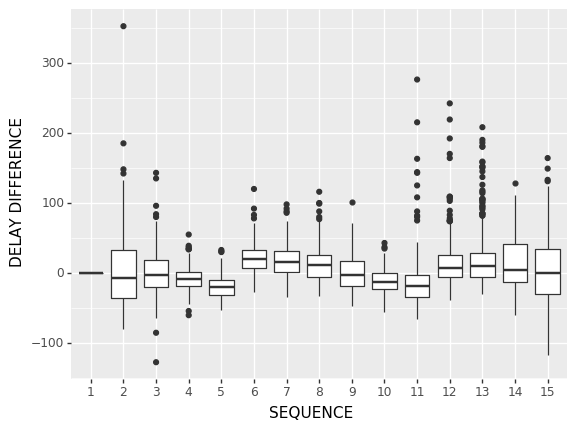

<ggplot: (-9223371892213106936)>

In [56]:
# boxplot rozdilu zpozdeni na jednotlive zastavky 
# a boxplot of the arrival difference for each bus stop, what this plot shows the spread of the delays with some outliers
df['SEQUENCE_cat'] = df['SEQUENCE'].astype('category')

plot_box1 = ggplot(df, aes(x='SEQUENCE_cat', y='DIFF_DELAY')) + \
            geom_boxplot() + \
            xlab("SEQUENCE") + \
            ylab("DELAY DIFFERENCE")
plot_box1

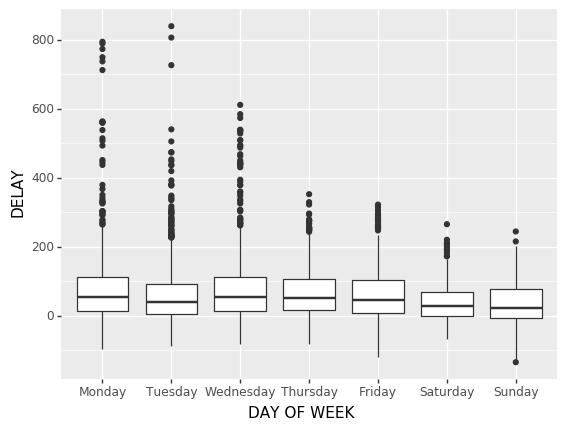

<ggplot: (-9223371892213107796)>

In [79]:
# boxplot zpozdeni v zavislosti na dni v tydnu
df['DAY_OF_WEEK_cat'] = df['DAY_OF_WEEK'].astype('category')

plot_box2 = ggplot(df, aes(x='DAY_OF_WEEK_cat', y='DELAY')) + \
            geom_boxplot() + \
            xlab("DAY OF WEEK") + \
            ylab("DELAY")
plot_box2

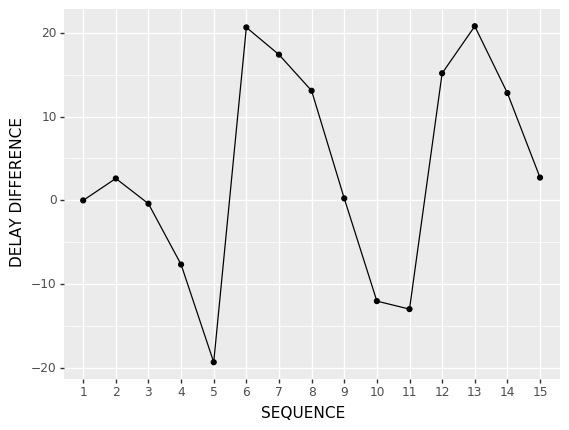

<ggplot: (-9223371892210572324)>

In [80]:
# 
avg_delay_for_stop = df.groupby(['SEQUENCE'])[['DIFF_DELAY']].mean()
avg_delay_for_stop = avg_delay_for_stop.reset_index()

ggplot(avg_delay_for_stop, aes(x='SEQUENCE', y='DIFF_DELAY')) + \
    geom_point() + \
    geom_line() + \
    scale_x_discrete(limits=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)) + \
    xlab("SEQUENCE") + \
    ylab("DELAY DIFFERENCE")

In [57]:
# populace - vsechny hodnoty  
df['DELAY'].describe()

count    5025.000000
mean       65.437413
std        90.389346
min      -135.000000
25%         8.000000
50%        45.000000
75%       102.000000
max       839.000000
Name: DELAY, dtype: float64

In [58]:
df.groupby('SEQUENCE')['DIFF_DELAY'].describe()

,count,mean,std,min,25%,50%,75%,max
SEQUENCE,,,,,,,,
1,335.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,335.0,2.614925,52.281691,-79.0,-36.0,-7.0,33.5,352.0
3,335.0,-0.394030,30.956121,-127.0,-20.0,-2.0,19.0,143.0
4,335.0,-7.641791,15.926573,-60.0,-18.0,-9.0,2.0,55.0
5,335.0,-19.289552,16.115128,-52.0,-31.5,-20.0,-10.0,33.0
6,335.0,20.623881,19.005405,-27.0,7.0,20.0,33.0,120.0
7,335.0,17.376119,21.473881,-34.0,2.0,16.0,31.0,98.0
8,335.0,13.071642,25.346833,-32.0,-6.0,11.0,26.0,116.0
9,335.0,0.241791,25.505865,-47.0,-19.0,-3.0,17.0,101.0


In [59]:
df[df['SEQUENCE']!=13]['DIFF_DELAY'].describe()

count    4690.000000
mean        2.307676
std        32.286020
min      -127.000000
25%       -17.000000
50%         0.000000
75%        18.000000
max       352.000000
Name: DIFF_DELAY, dtype: float64

In [60]:
df[df['SEQUENCE']==13]['DIFF_DELAY'].describe()

count    335.000000
mean      20.764179
std       41.479970
min      -30.000000
25%       -6.000000
50%       10.000000
75%       28.500000
max      208.000000
Name: DIFF_DELAY, dtype: float64

In [ ]:
# zkouska grupovani a zprumerovani
# avg_delay = df.groupby(['DAY_OF_WEEK','SEQUENCE'])[['DELAY']].mean().unstack()

In [61]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DAY_OF_WEEK'] = pd.Categorical(df['DAY_OF_WEEK'], days)
df.sort_values('DAY_OF_WEEK')

,TRIP_ID,ROUTE,DAY_OF_WEEK,DATE,UNICORN,START_TIME,HEADSIGN,STOP_ID,STOP_SEQUENCE,STOP_NAME,SHAPE_DIST_TRAVELED,DELAY,DIFF_DELAY,PREV_DELAY,SEQUENCE,SEQUENCE_cat
4536,331_241_200302,331,Monday,2020-05-18,331_241_200302_18_May,06:46:00,"Praha,Kačerov",U783Z2,20,U Libušské sokolovny,18.11122,-15.0,9.0,-24.0,7,7
957,333_1064_200302,333,Monday,2020-05-04,333_1064_200302_04_May,06:59:00,"Praha,Kačerov",U893Z4,26,Zálesí,17.03180,16.0,23.0,-7.0,13,13
956,333_1064_200302,333,Monday,2020-05-04,333_1064_200302_04_May,06:59:00,"Praha,Kačerov",U656Z2,25,Sídliště Krč,16.56781,-7.0,-17.0,10.0,12,12
955,333_1064_200302,333,Monday,2020-05-04,333_1064_200302_04_May,06:59:00,"Praha,Kačerov",U749Z2,24,Tempo,16.22898,10.0,8.0,2.0,11,11
954,333_1064_200302,333,Monday,2020-05-04,333_1064_200302_04_May,06:59:00,"Praha,Kačerov",U194Z2,23,Jalodvorská,15.36010,2.0,-34.0,36.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,333_1037_200307,333,Sunday,2020-05-03,333_1037_200307_03_May,10:39:00,"Praha,Kačerov",U194Z2,23,Jalodvorská,15.36010,85.0,-18.0,103.0,10,10
2033,333_1037_200307,333,Sunday,2020-05-03,333_1037_200307_03_May,10:39:00,"Praha,Kačerov",U804Z2,22,U Zvoničky,15.00124,103.0,-24.0,127.0,9,9
2032,333_1037_200307,333,Sunday,2020-05-03,333_1037_200307_03_May,10:39:00,"Praha,Kačerov",U335Z2,21,Libuš,14.69057,127.0,5.0,122.0,8,8
1695,333_1014_200307,333,Sunday,2020-05-10,333_1014_200307_10_May,11:38:00,"Praha,Kačerov",U1502Z2,14,"Dolní Břežany,Náměstí",9.79442,13.0,0.0,-56.0,1,1


In [62]:
days_col = ['#74CDDC' , '#ffffb3','#BBC9DB','#fb8072','#386cb0','#28AE7B','#4DFFA5']

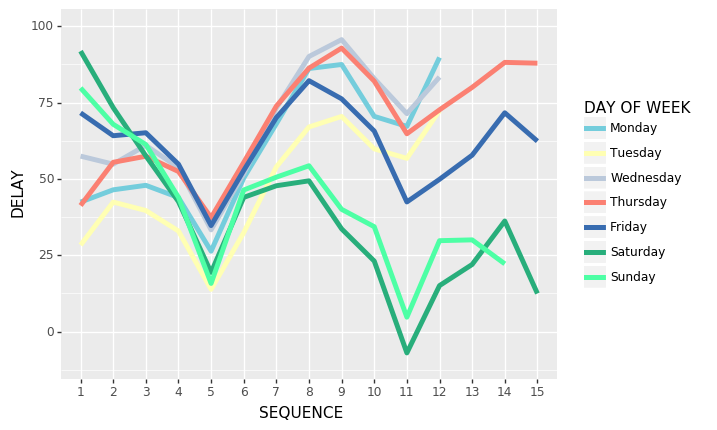

<ggplot: (-9223371892211985072)>


In [63]:
avg_delay1 = df.groupby(['DAY_OF_WEEK','SEQUENCE'])[['DELAY']].mean()
avg_delay1 = avg_delay1.reset_index()
plot_week1 = ggplot(avg_delay1, aes(x='SEQUENCE', y='DELAY', color='DAY_OF_WEEK')) +\
            geom_line(size=2) + \
            xlab("SEQUENCE") + \
            ylab("DELAY") + \
            labs(color='DAY OF WEEK') + \
            scale_color_manual(values=days_col) + \
            scale_x_discrete(limits=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)) + \
            ylim(-10,100)
print(plot_week1)

In [ ]:
avg_diff_delay = df.groupby(['DAY_OF_WEEK','SEQUENCE'])[['DIFF_DELAY']].median()
avg_diff_delay = avg_diff_delay.reset_index()
plot_week2 = ggplot(avg_diff_delay, aes(x='SEQUENCE', y='DIFF_DELAY', color='DAY_OF_WEEK')) +\
            geom_line(size=2) + \
            xlab("SEQUENCE") + \
            ylab("DELAY DIFFERENCE") + \
            geom_hline(yintercept=0,linetype='dotted') + \
            labs(color='DAY OF WEEK') + \
            scale_color_manual(values=days_col) + \
            scale_x_discrete(limits=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))    
print(plot_week2)

In [ ]:
from typing import List

In [ ]:
def delay_by_time(data: pd.DataFrame, start_time: str, end_time: str):
    data_by_time = data[(data['START_TIME'] > start_time) & (data['START_TIME'] < end_time)]
    avg_delay_time = data_by_time.groupby(['START_TIME','SEQUENCE'])[['DELAY']].mean()
    avg_delay_time = data_by_time.reset_index()
    return avg_delay_time

In [ ]:
time1 = delay_by_time(df, '06:30:00', '07:30:00')
time2 = delay_by_time(df, '07:30:00', '08:30:00')
time3 = delay_by_time(df, '09:30:00', '10:30:00')
time4 = delay_by_time(df, '10:30:00', '11:30:00')

In [ ]:
def its_plot_time(n_rows, n_cols, times, labels, axes, min_y, max_y):
    for i in range(n_rows):
        time = times[i]
        label = labels[i]

        for uni in day:
            #columns = data[data['UNICORN'] == uni][['SEQUENCE','DELAY']].sort_values(by='SEQUENCE')
            min_y = min(data['DELAY'].min(), min_y)
            max_y = max(data['DELAY'].max(), max_y)
            axes[i][col_num].plot(columns['SEQUENCE'],columns['DELAY'], linestyle = '-', marker = '.',label=uni)
            #axes[i][col_num].legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.)
            axes[i][col_num].set_xlabel('BUS STOP')
            axes[i][col_num].set_ylabel('DELAY in sec')
            axes[i][col_num].set_title(label)
    for ax in axes:
        for x in ax:
            x.set_ylim(min_y, max_y)
            x.set_xticks(range(15))
            x.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [ ]:
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,25))
min_y = 1000
max_y = -1000

times = [time1,time2,time3,time4]
labels = [
    ['CAS 1'],['CAS 2'],['CAS 3'],['CAS 4']
]

for i in range(num_cols):
    its_plot_time(num_rows, i, times[i], labels[i], axes, min_y, max_y)
    
plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.5, wspace=0.2)

In [ ]:
#avg_delay_time = df_time.groupby(['START_TIME','SEQUENCE'])[['DIFF_DELAY']].mean()
#avg_delay_time = avg_delay_time.reset_index()
plot_week3 = ggplot(pd.DataFrame(time1), aes(x='SEQUENCE', y='DIFF_DELAY', color='START_TIME')) +\
            geom_line(size=2) + \
            xlab("SEQUENCE") + \
            ylab("DIFF_DELAY") + \
            labs(color='START TIME') + \
            scale_x_discrete(limits=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)) + \
            scale_color_manual(values=days_col)
            #facet_wrap(['START_TIME'], nrow=5)
print(plot_week3)

df1 = df[(df['SEQUENCE'] > 11) & (df['SEQUENCE'] < 15)]
df1

In [ ]:
# histogram
plot_hist2 = ggplot(df1, aes(x='DIFF_DELAY')) + \
            geom_histogram(color='black', fill='#74CDDC', bins=15) + \
            xlab("DIFF_DELAY") + \
            ylab("COUNT")

plot_hist2

In [ ]:
# Shapiro-Wilk Test - normality test
stat1, p1 = shapiro(df1['DIFF_DELAY'])
print(f'Statistics={stat1}, p={round(p1,5)}')
# interpret
alpha = 0.1
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')